In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import bokeh as bk
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

from plotnine import *
import plotnine.options as pno

import altair as alt

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import numpy as np

In [7]:
dataset = pd.read_csv("data.csv")
dataset_sm = dataset.sample(axis = 0, n=10000)



## 3D Scatterplot Test

Trivariate, numeric data, categorical color. Downsampling to make the plots readable.


### Matplotlib
Highly abbreviated arguments, makes it hard to intuit the grammar.

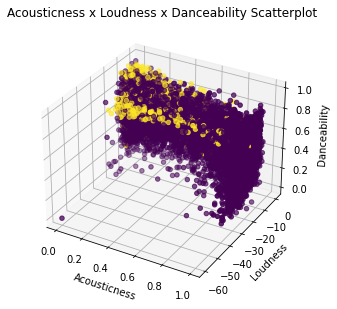

In [8]:
#plt.scatter(x=dataset.acousticness, y=dataset.loudness, alpha=0.75, s=2)
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
fig = plt.figure(figsize = [10,5])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=dataset_sm.acousticness, ys=dataset_sm.loudness, zs=dataset_sm.danceability, c=dataset_sm.explicit)


ax.set_title('Acousticness x Loudness x Danceability Scatterplot')
ax.set_xlabel('Acousticness')
ax.set_ylabel('Loudness')
ax.set_zlabel('Danceability')

plt.show()

### Seaborn

Just matplotlib.

### Bokeh

Requires javascript extension.

### Altair

No 3d scatter, surface only
https://docs.datawatch.com/designer/tutorial/visualization/desktop/1_1DatawatchVisualizations.htm

### Plotnine

Not supported.


### Plotly

Setting element visual traits requires passing vectors the same length as data, column names, etc. Can't just pass a constant.

In [ ]:

fig = px.scatter(dataset, 
                 x="acousticness", 
                 y='loudness', 
                 title="Acousticness x Loudness Scatterplot", 
                 template='plotly_white')
fig.update_layout(
    width=700,height=400,
    margin=dict(l=15,r=25,b=15,t=40,pad=1))
fig.show()

In [51]:
from plotly.graph_objects import layout, Scene, XAxis, YAxis

x=dataset_sm.acousticness
y=dataset_sm.loudness
z=dataset_sm.danceability
col=dataset_sm.explicit

fig = go.Figure(
    data=[go.Scatter3d(x=x,y=y,z=z,mode='markers',
    marker=dict(size=2, color = np.array(col), colorscale = 'Viridis', opacity=0.8))])

fig.update_layout(
    title="Acousticness x Loudness x Danceability Scatterplot", 
    template='plotly_white',
    autosize=False,
    width=600,height=500,
    scene=Scene(
        xaxis=XAxis(title='Acousticness'),
        yaxis=YAxis(title='Loudness'),
        zaxis=scene.ZAxis(title='Danceability')
    ),
    margin=dict(l=1,r=1,b=10,t=45,pad=1))
fig.show()

## Scatterplot Results

Unscientific rankings by me, 1 = best, 6 = worst. Ease of use now includes consistency in the grammar making it easier to move from histogram to scatterplot also.


|            |features     |beauty    |ease of use   |
|------------|-------------|----------|--------|
|matplotlib  |    6        |    3     |   6   |
|seaborn     |    4        |    5     |   4   |
|bokeh       |    1        |    1     |   1   |
|altair      |    3        |    2     |   3   |
|plotnine    |    2        |    4     |   2   |
|plotly      |    5        |    6     |   5   |

